In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm

input_shape = (150,150,3)
img_width = 150
img_height = 150

#Crearea une baze de date
nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 32
epochs = 10

#fisiere/imaginile care vor fi folosite pentru a crea o baza de date
#in procesul de instruire si validare
train_data_dir = 'C:\Users\Harum\Documents\train'
validation_data_dir = 'C:\Users\Harum\Documents\validation'

#folosit pentru a resacal valorile pixalilor de la intervalul [0, 255] la [0,1] 
datagen = ImageDataGenerator(rescale=1./255)

#preia automat imaginile si clasel lor pentru  instruire si validare
train_generator = datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height),batch_size=16, class_mode='binary')

validation_generator = datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=32,class_mode='binary')

#creare model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

#compile model
model.compile('rmsprop','binary_crossentropy',['accuracy'])

#
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,         #normalizar valoare pixluil to [0,1]
    shear_range=0.2,        #se aplica aleatoriu transformarea forfecari
    zoom_range=0.2,         # se aplica aleatoriu transformarea forfecari
    horizontal_flip=True    # intoarceti la intamplare imaginea  
)

#acelasi cod ca si inainte
train_datagen_augmented = train_datagen_augmented.flow_from_directory(
    train_data_dir,
    (img_width,img_height),
    batch_size=batch_size,
    class_mode='binary'
)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps= nb_validation_samples // batch_size
)









In [ ]:
#plotting our loss grafic
import matplotlib.pyplot as plt 

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#plotting  accuracy grafic
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+1 )

line1 = plt.plot(epochs, val_loss_values, label= 'Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
#salveaza modelul creat mai sus
model.save("")

In [21]:
#incarca modele create
from keras.models import load_model

model = load_model('cats_vs_dogs_dataugment_working.h5')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)       

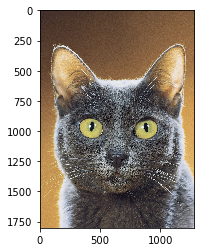

In [22]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


#introduce o imagine care nu face parte din baza de date
input_image_path = '007459b2a9f3002569cb3b462c42e417.jpg'

#Afiseaza imaginea de intrare pentru vizualizarea caracteristicilor
img1 = image.load_img(input_image_path)
plt.imshow(img1)

#stabileste dimensiunea imagini
img_size = (150, 150)

#incarcati imaginea intr-un Tensor 4D, convetestel intr-un numpy array si extindetil la 4 dimensiuni
img1 = image.load_img(input_image_path, target_size=img_size)
image_tensor = image.img_to_array(img1)

#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)


Crearea unui model dintr-un tensor de intrare si o lista de tensori de iesire
Pentru a extreage harti de caracteristici, cream un model Keras care ia batch(loturi) de imagini ca intrare si produce activarile tuturor straturilor de convolutie si de combinare







In [23]:
import keras
from keras import models

#Extragem primel 8 straturi
layer_outputs = [layer.output for layer in model.layers[:9]]

#Creaza un model care returneaza acelsi iesiri avand in vedere introducerea modelului
activation_model = models.Model(inputs=model.input, outputs=layer_outputs )


Executati imaginea prin functia de predictie a modelului 

In [24]:
activations = activation_model.predict(image_tensor)

In [27]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Sa ne uitam la primul canal

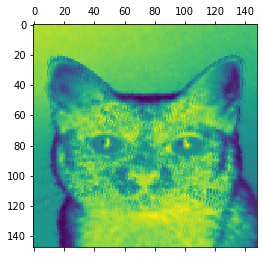

In [28]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

Sa ne uitam la al 7-lea canal

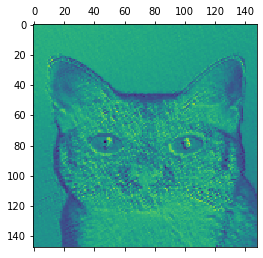

In [29]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')


Sa plot toate 32

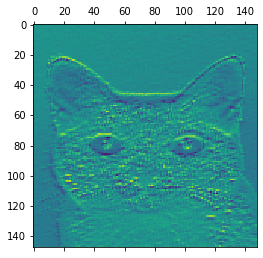

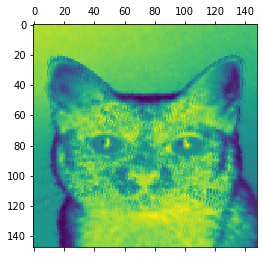

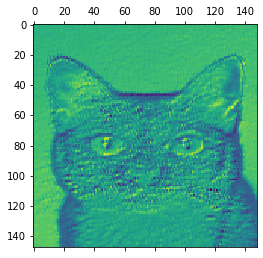

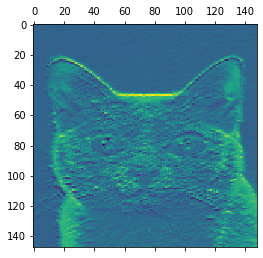

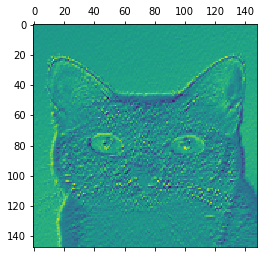

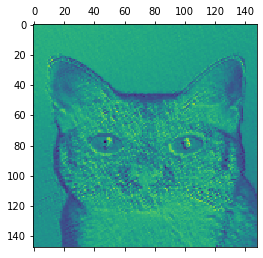

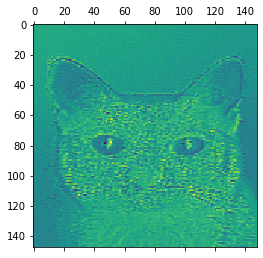

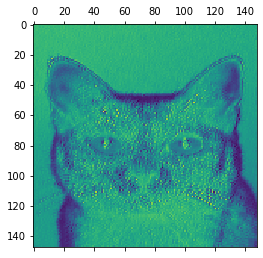

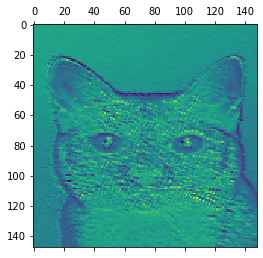

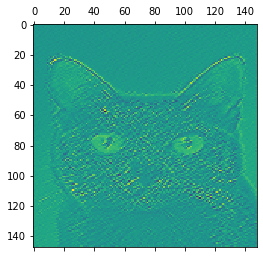

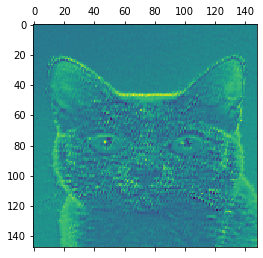

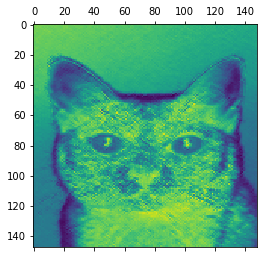

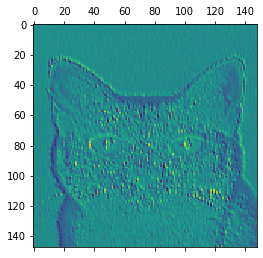

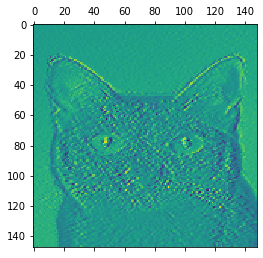

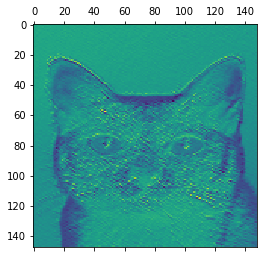

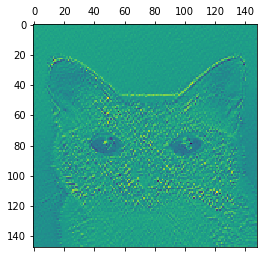

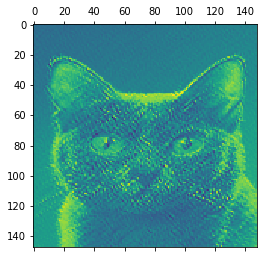

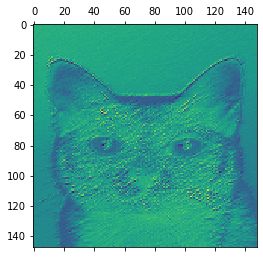

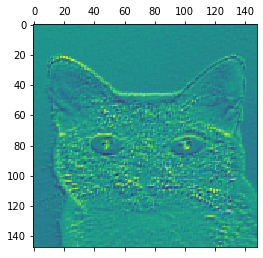

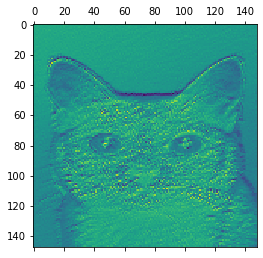

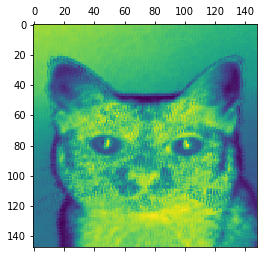

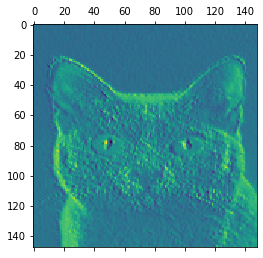

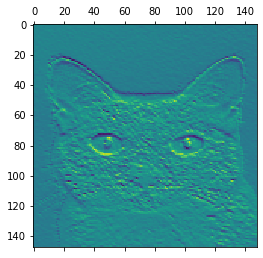

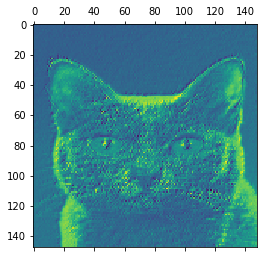

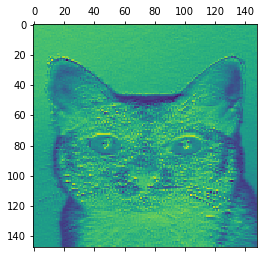

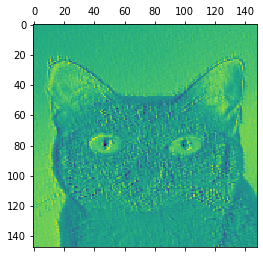

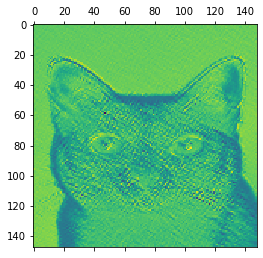

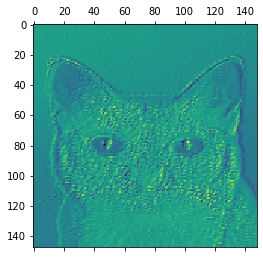

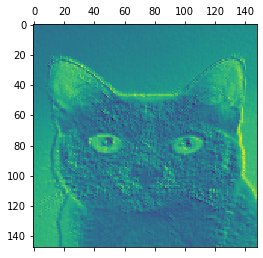

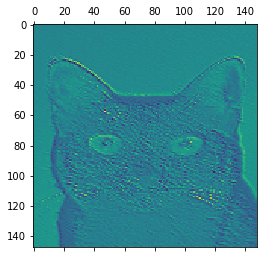

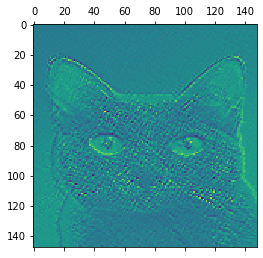

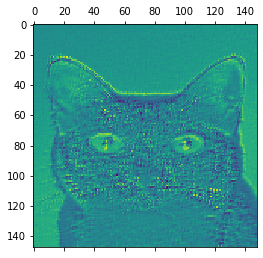

In [30]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0,:,:,i], cmap='viridis')

#vizualizare fiecare activari a stratului 

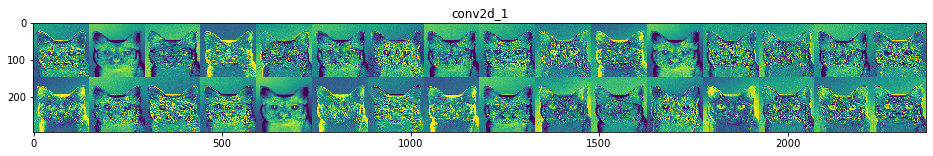

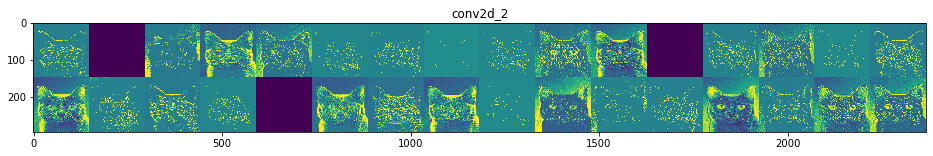

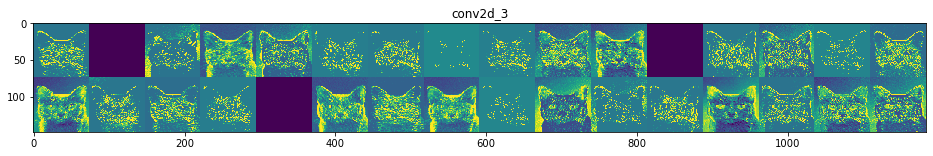

In [31]:
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

#optine doar stratul CONV
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names,activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row +row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col* size : (col +1) * size, row * size: (row+1)*size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')   

Observatii
Vedeti ca primul strat actioneaza in principal ca diferite tipuri de detectoare de margine si activarile pastreaza cea mai mare parte a imagini de intrare

Pe masura ce tecem mai sus pe retea la al 2-lea si la al 3-lea strat, putem vedea ca activarile devin mai abstracte si mai greu de interpretat vizual. Dar este posibil sa observati ca pastraza concepte vizuale la nivel inalt, precum ochi de  psica sau conturul sau chiar urechile pisicii

Multe activari necompletate in etapele mai adnci ulterioare, acest lucru inseamna ca modelul codificat de acele filtre nu a fost activat de imaginea de intrare.





